In [19]:
import pandas as pd
import frust.vis as vis

In [20]:
conversion_factor       =  627.509474
# dimer_dft               = -834847.294
# HBpin_dft               = -258305.91711374212
# H2_dft                  = -737.1088023791428

dimer_xtb               = -97.050557670754 * conversion_factor
HBpin_xtb               = -28.947535986441 * conversion_factor
H2_xtb                  = -0.9826859256890 * conversion_factor

In [21]:
df_gen = pd.read_parquet("output_files/14_generics_fontaine_25-10-25.parquet")
df_gen = df_gen[["ligand_name", "rpos", "atoms", "xtb-gfn-opt-opt_coords", "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"]].rename(columns={"DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "E_gen"})
df_gen.sort_values(by=["ligand_name", "E_gen"])
df_gen = df_gen.groupby("ligand_name").head(1)
df_gen["E_gen"] = df_gen["E_gen"] * conversion_factor
#vis.plot_mols(df_gen)

dimer_dft = df_gen.loc[14, "E_gen"]
HBpin_dft = df_gen.loc[147, "E_gen"]
H2_dft    = df_gen.loc[70, "E_gen"]
print(dimer_dft, HBpin_dft, H2_dft)

-835238.0254662238 -258394.18698545368 -736.034581605119


# int3

In [22]:
df_int3 = pd.read_parquet("output_files/10_int3_TMP.parquet")
df_int3 = df_int3[
    [
        "ligand_name",
        "rpos",
        "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ]
].rename(
    columns={
        "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy": "E_int3",
    }
)

df_ligs = pd.read_parquet("output_files/13_ligands_fontaine_26-10-25.parquet")
df_ligs = df_ligs[
    [
        "ligand_name",
        "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy",
        "xtb-gfn-opt-electronic_energy",
    ]
].rename(
    columns={
        "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "E_lig",
        "xtb-gfn-opt-electronic_energy": "E_xtb",
    }
)

df_int3["E_int3"] = df_int3["E_int3"] * conversion_factor
df_ligs[["E_lig", "E_xtb"]] = df_ligs[["E_lig", "E_xtb"]] * conversion_factor

In [23]:
df_ligs = df_ligs.sort_values(by=["ligand_name", "E_lig"]).groupby("ligand_name").head(1)
if "E_xtb" in df_ligs.columns:
    df_ligs.drop(columns=["E_xtb"], inplace=True)

In [24]:
df_merged = df_int3.merge(df_ligs)
df_merged

,ligand_name,rpos,E_int3,E_lig
0,1-benzylpyrrole,3,-9.767481e+05,-301458.538062
1,1-benzylpyrrole,4,-9.767439e+05,-301458.538062
2,1-benzylpyrrole,5,-9.767427e+05,-301458.538062
3,1-benzylpyrrole,8,-9.767600e+05,-301458.538062
4,1-benzylpyrrole,9,-9.767559e+05,-301458.538062
5,1-methylindole,4,-9.281871e+05,-252900.676231
6,1-methylindole,5,-9.281872e+05,-252900.676231
7,1-methylindole,6,-9.281876e+05,-252900.676231
8,1-methylindole,7,-9.281853e+05,-252900.676231
9,1-methylindole,8,-9.281972e+05,-252900.676231


In [25]:
df_merged["dE"] = (2 * (df_merged["E_int3"] - df_merged["E_lig"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df_merged

,ligand_name,rpos,E_int3,E_lig,dE
0,1-benzylpyrrole,3,-9.767481e+05,-301458.538062,-12.440850
1,1-benzylpyrrole,4,-9.767439e+05,-301458.538062,-8.176699
2,1-benzylpyrrole,5,-9.767427e+05,-301458.538062,-6.963274
3,1-benzylpyrrole,8,-9.767600e+05,-301458.538062,-24.285178
4,1-benzylpyrrole,9,-9.767559e+05,-301458.538062,-20.238187
5,1-methylindole,4,-9.281871e+05,-252900.676231,-9.291425
6,1-methylindole,5,-9.281872e+05,-252900.676231,-9.400594
7,1-methylindole,6,-9.281876e+05,-252900.676231,-9.749680
8,1-methylindole,7,-9.281853e+05,-252900.676231,-7.479719
9,1-methylindole,8,-9.281972e+05,-252900.676231,-19.349666


In [26]:
df_int3_dft = pd.read_csv("misc/int_dG_dE_final.csv", index_col=0)
df_int3_dft.rename(columns={"dG": "dG_dft", "dE": "dE_xtb"}, inplace=True)
df_int3_dft

,ligand_name,rpos,dG_dft,dE_xtb
0,1-benzylpyrrole,3,23.730373,24.123719
1,1-benzylpyrrole,4,12.530532,24.114596
2,1-benzylpyrrole,5,27.127656,24.732421
3,1-benzylpyrrole,8,12.853314,15.238014
4,1-benzylpyrrole,9,13.790109,18.590982
5,1-methylindole,4,22.531477,23.439649
6,1-methylindole,5,22.080210,24.573250
7,1-methylindole,6,22.205701,23.723085
8,1-methylindole,7,26.918317,23.526248
9,1-methylindole,8,11.959853,17.921509


In [27]:
df_merged = df_merged.merge(df_int3_dft)
df_merged

,ligand_name,rpos,E_int3,E_lig,dE,dG_dft,dE_xtb
0,1-benzylpyrrole,3,-9.767481e+05,-301458.538062,-12.440850,23.730373,24.123719
1,1-benzylpyrrole,4,-9.767439e+05,-301458.538062,-8.176699,12.530532,24.114596
2,1-benzylpyrrole,5,-9.767427e+05,-301458.538062,-6.963274,27.127656,24.732421
3,1-benzylpyrrole,8,-9.767600e+05,-301458.538062,-24.285178,12.853314,15.238014
4,1-benzylpyrrole,9,-9.767559e+05,-301458.538062,-20.238187,13.790109,18.590982
5,1-methylindole,4,-9.281871e+05,-252900.676231,-9.291425,22.531477,23.439649
6,1-methylindole,5,-9.281872e+05,-252900.676231,-9.400594,22.080210,24.573250
7,1-methylindole,6,-9.281876e+05,-252900.676231,-9.749680,22.205701,23.723085
8,1-methylindole,7,-9.281853e+05,-252900.676231,-7.479719,26.918317,23.526248
9,1-methylindole,8,-9.281972e+05,-252900.676231,-19.349666,11.959853,17.921509


[INFO]: Linear relation: y = 0.791906x - 27.177680


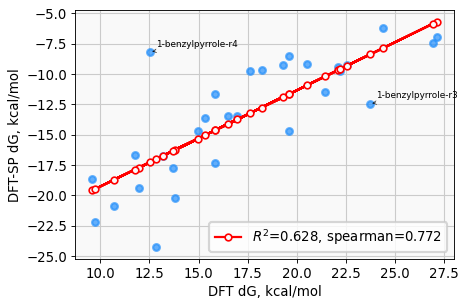

In [28]:
vis.plot_regression_outliers(df_merged, "dG_dft", "dE", size=(6, 4), xlabel="DFT dG, kcal/mol", ylabel="DFT-SP dG, kcal/mol")

# TS3

In [29]:
df_ts3 = pd.read_parquet("output_files/15_ts3_TMP_font_1.parquet").drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"])
df_ts3 = df_ts3[
    [
        "ligand_name",
        "rpos",
        "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ]
].rename(
    columns={
        "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy": "E_ts3",
    }
)
df_ts3["E_ts3"] *= conversion_factor

df_ts3 = df_ts3.merge(df_ligs)
df_ts3["dE"] = (2 * (df_ts3["E_ts3"] - df_ts3["E_lig"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df_ts3 = df_ts3.merge(df_int3_dft)
df_ts3

,ligand_name,rpos,E_ts3,E_lig,dE,dG_dft,dE_xtb
0,1-methylindole,5,-9.281861e+05,-252900.676231,-8.222999,22.080210,24.573250
1,1-methylindole,7,-9.281866e+05,-252900.676231,-8.800435,26.918317,23.526248
2,1-methylindole,8,-9.281923e+05,-252900.676231,-14.435776,11.959853,17.921509
3,1-methylindole,9,-9.281893e+05,-252900.676231,-11.467921,19.619159,18.270049
4,1-methylpyrrole,2,-8.317986e+05,-156509.812112,-11.588322,13.721026,16.024499
5,1-methylpyrrole,3,-8.317964e+05,-156509.812112,-9.421287,15.312321,20.460735
6,"2,3-dihydrothieno[3,4-b][1,4]dioxine",1,-1.165203e+06,-489911.091751,-14.409754,13.208078,18.319512
7,2-methoxyfuran,3,-8.914352e+05,-216146.269078,-11.753484,11.754619,20.750604
8,2-methoxyfuran,4,-8.914319e+05,-216146.269078,-8.460227,18.209143,24.083352
9,2-methoxyfuran,5,-8.914370e+05,-216146.269078,-13.575688,9.592338,17.704210


[INFO]: Linear relation: y = 0.400757x - 17.143369


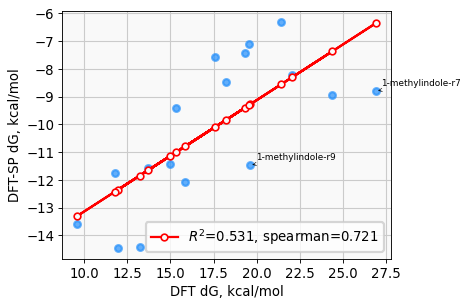

In [30]:
vis.plot_regression_outliers(df_ts3, x_col="dG_dft", y_col="dE", xlabel="DFT dG, kcal/mol", ylabel="DFT-SP dG, kcal/mol", size=(6, 4))

# TS4

In [31]:
df_ts4 = pd.read_parquet("output_files/16_ts4_TMP_font_1.parquet").drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"])
df_ts4 = df_ts4[
    [
        "ligand_name",
        "rpos",
        "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ]
].rename(
    columns={
        "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy": "E_ts4",
    }
)
df_ts4["E_ts4"] *= conversion_factor

df_ts4 = df_ts4.merge(df_ligs)
df_ts4["dE"] = (2 * (df_ts4["E_ts4"] - df_ts4["E_lig"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df_ts4 = df_ts4.merge(df_int3_dft)
df_ts4

,ligand_name,rpos,E_ts4,E_lig,dE,dG_dft,dE_xtb
0,1-methylindole,4,-9.281797e+05,-252900.676231,-1.885140,22.531477,23.439649
1,1-methylindole,5,-9.281844e+05,-252900.676231,-6.596278,22.080210,24.573250
2,1-methylindole,6,-9.281851e+05,-252900.676231,-7.228562,22.205701,23.723085
3,1-methylindole,7,-9.281848e+05,-252900.676231,-6.981090,26.918317,23.526248
4,1-methylindole,8,-9.281954e+05,-252900.676231,-17.527751,11.959853,17.921509
5,1-methylindole,9,-9.281891e+05,-252900.676231,-11.253564,19.619159,18.270049
6,1-methylpyrrole,2,-8.318010e+05,-156509.812112,-13.992422,13.721026,16.024499
7,1-methylpyrrole,3,-8.317986e+05,-156509.812112,-11.648899,15.312321,20.460735
8,"2,3-dihydrothieno[3,4-b][1,4]dioxine",1,-1.165202e+06,-489911.091751,-13.864654,13.208078,18.319512
9,2-methoxyfuran,3,-8.914385e+05,-216146.269078,-15.020675,11.754619,20.750604


[INFO]: Linear relation: y = 0.662180x - 21.472986


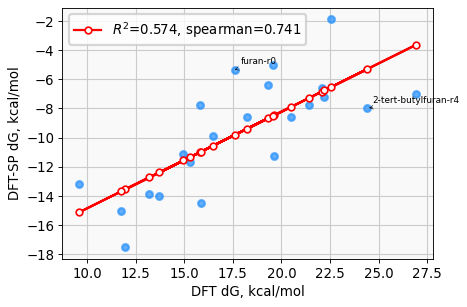

In [32]:
vis.plot_regression_outliers(df_ts4, x_col="dG_dft", y_col="dE", xlabel="DFT dG, kcal/mol", ylabel="DFT-SP dG, kcal/mol", size=(6,4))